# Maps

files needed = ('cities_4269.zip') </br>
we will download = ('ne_50m_admin_0_countries.zip', 'cb_2021_us_county_5m.zip')

Okay, we now know enough about figures and pandas to get a map off the ground.

We will use the geopandas package to plot our maps. Maps are really quite complicated. We are trying to project a spherical surface onto a flat figure, which is inherently a complicated endeavor. Luckily, geopandas will handle most of it for us. I would also add that geopandas is a notoriously difficult package to install. It relies on other software to be installed and set up correctly. (Try a google search for "geopandas install error.") This is another time when having winstat helps a lot.

Geopandas extends pandas to include geospatial data. It provides plotting routines that work with matplotlib to create visualizations.

In [ ]:
#abosolute color scale: easy to compare multiple choropleth and relative(range) color scale: wont understand maps overtime quickly

In [57]:
import pandas as pd                         # pandas for data management
import geopandas                            # geopandas for maps work
from shapely.geometry import Point          # shapely handles the coordinate references for plotting shapes
import matplotlib.pyplot as plt             # matplotlib for plotting details

### Setting up the GeoDataFrame
Let's start by plotting some cities. The DataFrame below holds longitudes and latitudes of major South American cities. Our goal is to turn them into something we can plot&mdash;in this case, a GeoDataFrame.

In [58]:
cities = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
cities.head()

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


We need tuples of coordinates to map the cities. We zip together lat and long to create the tuples and store them in a column named 'Coordinates'.

In [59]:
cities['Coordinates'] = list(zip(cities.Longitude, cities.Latitude))
cities.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,"(-58.66, -34.58)"
1,Brasilia,Brazil,-15.78,-47.91,"(-47.91, -15.78)"
2,Santiago,Chile,-33.45,-70.66,"(-70.66, -33.45)"
3,Bogota,Colombia,4.60,-74.08,"(-74.08, 4.6)"
4,Caracas,Venezuela,10.48,-66.86,"(-66.86, 10.48)"


So far, we haven't done anything that requires new packages. We just have a DataFrame full of numbers and strings.

Next, we turn the tuple into a [Point](https://shapely.readthedocs.io/en/stable/manual.html) object. Notice that we imported Point from the Shapely package in the first code cell. We use the `.map()` method of Series to apply the Point function to each row of the Coordinates column.

In [62]:
cities['Coordinates'] = cities['Coordinates'].map(Point)
cities.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


We now have a column of Point objects.

We turn the DataFrame into a **GeoDataFrame**, which is a data structure that understands how to plot maps. The **important** part here is that we specify the column that contains the `geometery` data. From the [docs](https://geopandas.org/en/stable/docs/user_guide/data_structures.html):

> The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the “geometry” column.

In our case, the geometry data are the points in the 'Coordinates' column.

In [63]:
gcities = geopandas.GeoDataFrame(cities, geomeftry='Coordinates')
gcities.head()

TypeError: DataFrame.__init__() got an unexpected keyword argument 'geomeftry'

In [64]:
# Doesn't look different than a vanilla DataFrame...let's make sure we have what we want.
print('gdf is of type:', type(gcities))

# And how can we tell which column is the geometry column? It is an attribute!
print('\nThe geometry column is:', gcities.geometry.name)

gdf is of type: <class 'geopandas.geodataframe.GeoDataFrame'>

The geometry column is: Coordinates


### Plotting the map
Okay, we have our points in the GeoDataFrame. Let's plot the locations on a map. We proceed in three steps:
1. Get the map
2. Plot the map
3. Plot the points on the map


### 1. Get the map
We will get our map data from [Natural Earth](https://www.naturalearthdata.com/). The file provides the outlines of countries over which we will plot the locations of the cities in our GeoDataFrame.

Go to Natural Earth and get the medium scale (1:50m) "cultural" dataset: Admin-0. The name of the file should be "ne_50m_admin_0_countries.zip". [Direct link](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip) to the data.

Two ways to deal with this file.
1. Unzip the folder. **Keep the folder and all of the files that are in the folder.** Then load the file 'ne_50m_admin_0_countries.shp'

2. Leave the file zipped. This usually works, but if it doesn't try method 1.

Then we load the shapefile using the `.read_file` method of geopandas.

In [65]:
# Step 1: Get the map.

# Method 1: Leave it zipped
#world = geopandas.read_file('ne_50m_admin_0_countries.zip')

# Method 2: Unzipped file
world = geopandas.read_file('ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')          #create a new folder called ne_50m_admin_0_countries that containsne_50m_admin_0_countries.shp 
world.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."


In [11]:
# Which column holds the geometry data?
world.geometry.name

'geometry'

This is another GeoDataFrame. The geometry data are the column named 'geometry'.

### A quick word about polygons


Instead of Points, the geometery are POLYGONs. The polygons are the shapes of countries.

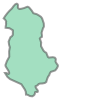

In [38]:
world = world.set_index('SOVEREIGNT')

# Hello Albania
world.loc['Albania','geometry']

Wow, that was cool.

A polygon is a loop of points connected by straight lines (e.g., triangle or rectangle). The more points we have, the closer the polygon can approximate non-linear shapes. So Albania's shape is defined by many points connected by lines.  

In [44]:
# Returns two arrays that hold the x and y coordinates of the points that define the polygon's exterior.
x, y = world.loc['Albania','geometry'].exterior.coords.xy

# How many points?
print('Points in the exterior of Albania:', len(x))


Points in the exterior of Albania: 113


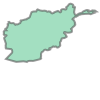

In [42]:
# Afghanistan is a more complicated shape
world.loc['Afghanistan','geometry']

In [15]:
# Returns two arrays that hold the x and y coordinates of the points that define the polygon's exterior.
x, y = world.loc['Afghanistan', 'geometry'].exterior.coords.xy

# How many points?
print('Points in the exterior of Afghanistan:', len(x))

Points in the exterior of Afghanistan: 410


### 2. Plotting the map

Here is the code. Details in the cell below it.

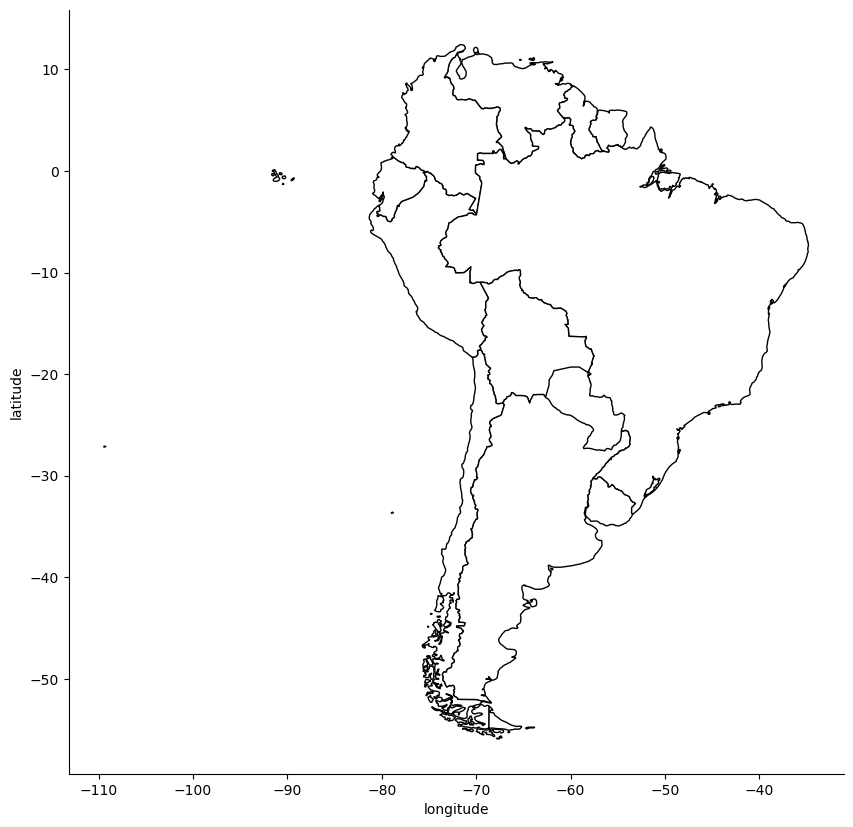

In [16]:
# Step 2: Plot the map

fig, gax = plt.subplots(figsize=(10,10))

# I only want to plot South America, so I create a list of the country codes
sa = ['ARG', 'BRA', 'COL', 'GUY', 'SUR', 'VEN', 'BOL', 'CHL', 'ECU', 'PER', 'URY']

world[world['SOV_A3'].isin(sa)].plot(ax = gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')  # By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


### GeoDataFrame plots
Nice one! That was easy, and now we have a map.

Note the different syntax for plot. We have been using the `plot()` method of matplotlib axes objects, so we usually called
```python
gax.plot(x, y)
```
which plotted x against y on the axis gax.

With a GeoDataFrame, we invoke the `plot()` method of a GeoDataFrame object with
```
gdf.plot(ax = gax)
```
which will **plot the geometry data in gdf** on the axis gax.  This is similar to the syntax that seaborn uses.

### Other options
Notice that lots of the regular matplotlib options still work. I can still turn off the top and right spines (do I want to?) and I can add x and y axes labels. The parameter 'edgecolor' sets the line colors, etc.

It looks like I didn't put a title on my plot. Poor form. Let's fix it when we add the cities.

### 3. Plot the cities on the map

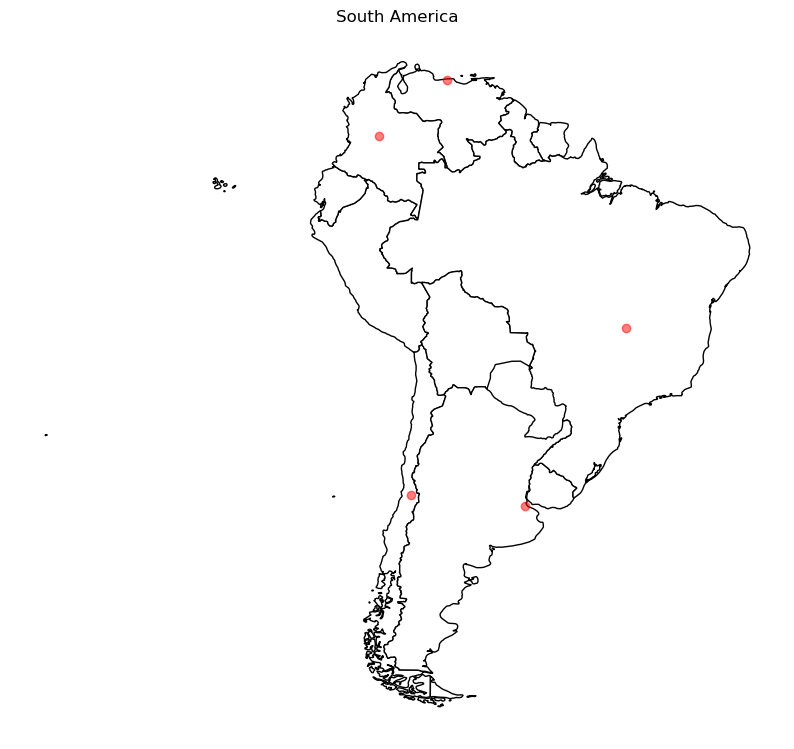

In [66]:
# Step 3: plot the cities onto the map
# We mostly use the code from before --- we still want the country borders ploted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

world[world['SOV_A3'].isin(sa)].plot(ax = gax, edgecolor='black', color='white')

# This plots the cities. It's the same sytax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gcities.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('South America')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# or get rid of all the axis
gax.axis('off')

plt.show()

This looks pretty nice. What else might we want to do?

* Maybe add some labels to the points? We can add labels to the figure using `text()` just like we would in a regular figure. We need to be a little careful about specifying where to put the label. We do this below if you are interested.
* I would probably remove all the axes, unless knowing the latitude and longitude is important.

## Top Hat Practice Exercise: Maps 1

Let's plot Wisconsin and all of its counties. Along the way, we will learn where to find 'shape files' for U.S. states and counties. Shape files hold the polygons of areas.

The steps:

1. Plot the county borders
2. Plot the cities


We'll do the first step together.

### 0. Download the data
Go to [https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.2021.html#list-tab-1883739534)  


Here we find shapefiles for all kinds of maps: states, counties, congressional districts, zip codes. These are the *cartographic boundary files*. They are simplified maps. For example, they do not include the tiny islands off the Wisconsin coast, even though those islands are part of the state. These simplified files are not meant for navigation, but for "thematic" mapping. Which is what we are doing. [Here](https://www.census.gov/programs-surveys/geography/technical-documentation/naming-convention/cartographic-boundary-file.html) is some background on the files.


We are going to work with the '5m' county border file. This means the resolution of the map is 1:5,000,000. There are 1:500,000 and 1:20,000,000 files, too. Different resolutions carry different levels of detail. You can experiment with the different shapefiles and see the differences.

Again, either leave the file zipped, or unzip it and keep all the files in the folder.

### 1. Plot the county borders

Let's add the county borders. To do so, we first need to get the shape files. Use the '5m' files.

1. Like before, read the file in to a GeoDataFrame.

In [67]:
county = geopandas.read_file('cb_2021_us_county_5m.zip')
county

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,059,00161555,0500000US01059,01059,Franklin,Franklin County,AL,Alabama,06,1641845708,32639621,"POLYGON ((-88.16591 34.38093, -88.16563 34.383..."
1,06,057,01682927,0500000US06057,06057,Nevada,Nevada County,CA,California,06,2480587301,41531993,"POLYGON ((-121.27953 39.23054, -121.25918 39.2..."
2,26,031,01622958,0500000US26031,26031,Cheboygan,Cheboygan County,MI,Michigan,06,1852564001,440607445,"POLYGON ((-84.73269 45.28938, -84.73239 45.787..."
3,29,119,00758518,0500000US29119,29119,McDonald,McDonald County,MO,Missouri,06,1397155452,520251,"POLYGON ((-94.61831 36.76656, -94.06890 36.747..."
4,31,157,00835900,0500000US31157,31157,Scotts Bluff,Scotts Bluff County,NE,Nebraska,06,1915576079,15402683,"POLYGON ((-104.05293 41.90614, -104.05299 41.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,13,301,00347777,0500000US13301,13301,Warren,Warren County,GA,Georgia,06,736483608,6034478,"POLYGON ((-82.86661 33.46660, -82.82314 33.504..."
3230,06,023,01681908,0500000US06023,06023,Humboldt,Humboldt County,CA,California,06,9241565229,1253726036,"POLYGON ((-124.40860 40.44320, -124.39664 40.4..."
3231,34,023,00882230,0500000US34023,34023,Middlesex,Middlesex County,NJ,New Jersey,06,800946845,35291196,"POLYGON ((-74.63060 40.33960, -74.62024 40.373..."
3232,13,311,00326781,0500000US13311,13311,White,White County,GA,Georgia,06,623524633,3917258,"POLYGON ((-83.87121 34.66490, -83.87251 34.683..."


2. This GeoDataFrame has all the counties for all the states in it. We only want the ones from Wisconsin. The federal information processing standard [(fips)](https://www.census.gov/library/reference/code-lists/ansi.html) code for Wisconsin is 55. Keep only counties from Wisconsin. (A chance to practice our subsetting!)

3. Plot the Wisconsin counties. You might try adapting the code from our example above plotting South America.

In [68]:
wi_counties = county[county['STATEFP'] == '55']
wi_counties.head(5)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
21,55,139,01581129,0500000US55139,55139,Winnebago,Winnebago County,WI,Wisconsin,06,1125859770,372631716,"POLYGON ((-88.88667 44.24262, -88.76620 44.243..."
48,55,017,01581068,0500000US55017,55017,Chippewa,Chippewa County,WI,Wisconsin,06,2611628507,85233303,"POLYGON ((-91.66565 45.20799, -91.54223 45.206..."
73,55,005,01581062,0500000US55005,55005,Barron,Barron County,WI,Wisconsin,06,2235281410,69194516,"POLYGON ((-92.15489 45.63974, -92.03142 45.639..."
114,55,041,01581080,0500000US55041,55041,Forest,Forest County,WI,Wisconsin,06,2626936100,83536591,"POLYGON ((-89.04779 45.98235, -88.93322 45.982..."
129,55,073,01581096,0500000US55073,55073,Marathon,Marathon County,WI,Wisconsin,06,4002035761,80651079,"POLYGON ((-90.31504 45.03383, -90.19752 45.033..."


## 2. Plot some cities

The file "cities_4269.zip" contains a shapefile with some Wisconsin cities.

Load the data, like you did with the county borders. The data include the location of the cities and their populations.

Add the cities to your plot. I made my cities blue dots.

In [69]:
# Step 1: Get the map.
import geopandas      
# Method 1: Leave it zipped
#city = geopandas.read_file('cities_4269.zip')

# Method 2: Unzipped file
cities = geopandas.read_file('cities_4269/cities_4269.shp')
cities.head(2)

,city,rank,state,growth_fro,population,geometry
0,West Allis,582.0,Wisconsin,-0.6,60697.0,POINT (-88.00703 43.01668)
1,Waukesha,475.0,Wisconsin,8.0,71016.0,POINT (-88.23148 43.01168)


## Extra: details on labeling maps

### Label the points

Let's return to the South American map from earlier and label the points with the city names.

Each label is our usual `.text()` method. It would be tedious to type all of those in, so let's automate this. Here is the code, we describe it below.

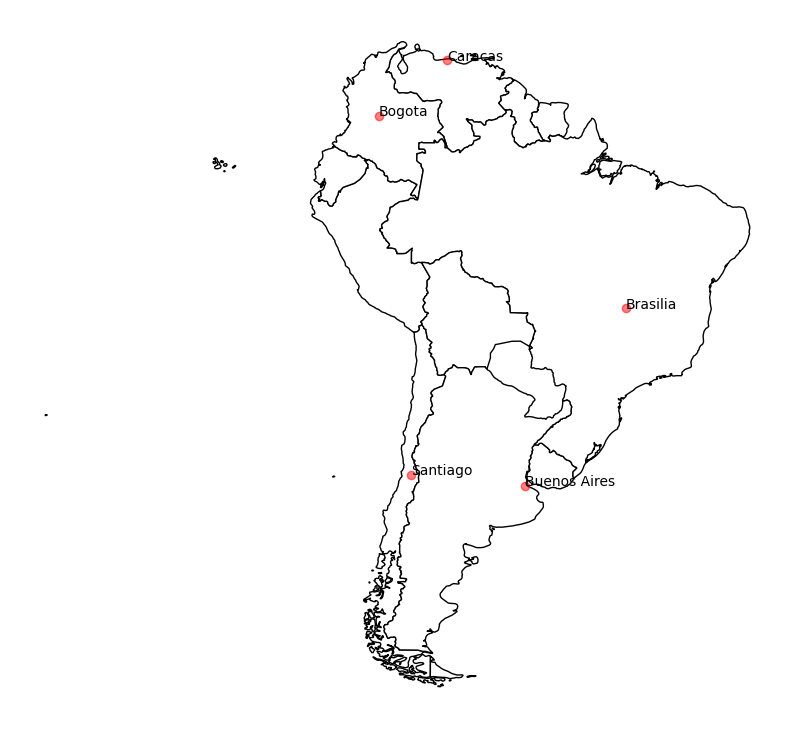

In [70]:
# Step 3: plot the cities onto the map
# We mostly use the code from before --- we still want the country borders ploted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))


world[world['SOV_A3'].isin(sa)].plot(ax = gax, edgecolor='black',color='white')

# This plot the cities. It's the same sytax, but we are plotting from a different GeoDataFrame. I want the
# cities as pale red dots.
gcities.plot(ax=gax, color='red', alpha = 0.5)

gax.axis('off')

# Label the cities
for x, y, label in zip(gcities['Coordinates'].x, gcities['Coordinates'].y, gcities['City']):
    gax.text(x, y, label)

plt.show()

### Adding labels to points
That took more work than I expected. Let's talk through that code. The first bit of code is
```python
for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['City']):
```
1. `for` is looping over each city in the GeoDataFrame.
2. `gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['City']` takes the x part of the coordinate, the y part of the coordinate and the name of the city for each city.
3. `zip()` combines the x-coord, the y-coord, and the name together ([zip](https://docs.python.org/3.3/library/functions.html#zip) is a handy function that takes multiple iterable objects and aggregates them together)
4. `x, y, label` will hold the three values.

So, for each row the `for` loops over, x is the x-coord, y is the y-coord, and label is the city name for city defined in that row. We use this data with `.text()` to apply the label at point (x,y)
```python
gax.text(x , y, label)
```

### Improving the labels
The labels get the job done, but they are a bit ugly. In particular, they are sitting on top of the dot.

We can use `annotate()` to fix this up. We have used `annotate()` before to add arrows connecting the text to a point. Here, we will use the ability to specify an offset of the text from the point. Here is the syntax
```python
gax.annotate(label, xy=(x,y), xytext=(3,3), textcoords='offset points')
```
The parameter 'xy' is the point we are referencing. The parameter 'xytext' holds the number of points to offset the text from the point. The argument 'offset points' tells annotate that the (3,3) tuple we passed to 'xytext' is full of points to offset the label from the text.  

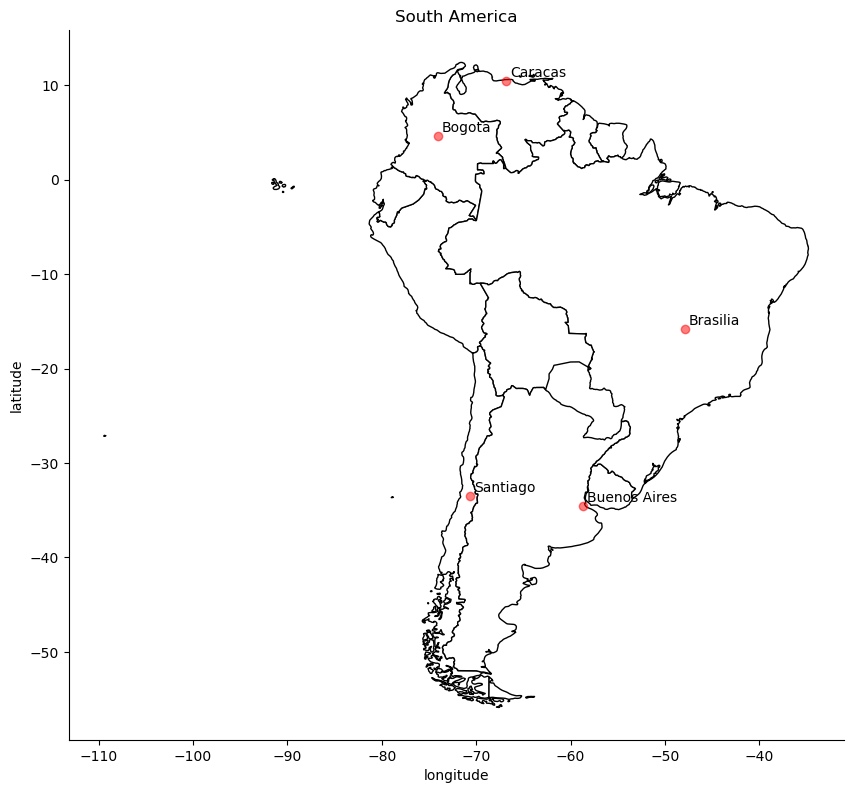

In [31]:
# Step 3: plot the cities onto the map
# We mostly use the code from before --- we still want the country borders ploted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

world[world['SOV_A3'].isin(sa)].plot(ax = gax, edgecolor='black',color='white')

# This plot the cities. It's the same sytax, but we are plotting from a different GeoDataFrame. I want the
# cities as pale red dots.
gcities.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('South America')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
# plt.axis('off')


# Label the cities
for x, y, label in zip(gcities['Coordinates'].x, gcities['Coordinates'].y, gcities['City']):
    gax.annotate(label, xy=(x,y), xytext=(3,3), textcoords='offset points')

plt.show()

## Extra practice

Add the names of the Wisconsin cities to your map.